In [1]:
import numpy as np
import librosa
import librosa.display
import os
from matplotlib import pyplot as plt
import random

Dataset_RAVDESS\Actor_01\03-01-01-01-01-01-01.wav


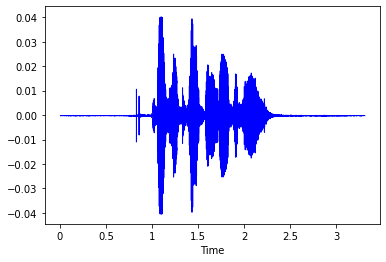

In [2]:
# attempt to load a wave file
wav_data_path = os.path.join("Dataset_RAVDESS","Actor_01","03-01-01-01-01-01-01.wav") 
print(wav_data_path)
x, fs = librosa.load(wav_data_path, sr=44100)

librosa.display.waveshow(x, sr=fs, color='blue')

In [3]:
x.shape

(462168,)

<ipython-input-4-e00070e708b3>:2: FutureWarning: Pass y=[ 2.9128509e-05 -9.4395460e-07  3.6090707e-05 ... -6.3290267e-05
  1.2563883e-05 -3.4199227e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


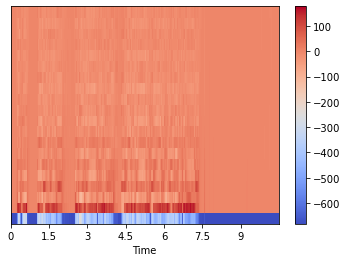

In [4]:
# transfer from wav to mfcc
mfccs = librosa.feature.mfcc(x, sr=fs)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [17]:
# noticed there are regions before and after the recording without any voice, attempt to remove them
def cut_silence(wavdata, eps=0.01):
    abs_data = np.abs(wavdata)
    threshold = np.max(abs_data) * eps
    #cut data < 0.01 * max y value from the beginning
    start = 0
    while start < len(wavdata) and abs_data[start] < threshold:
        start += 1
    #cut data < 0.01 * max y value from the end
    end = len(wavdata)-1
    while end > 0 and abs_data[end] < threshold:
        end -= 1
    return wavdata[start:end+1]

In [8]:
# after cutting, show the wav data
x = cut_silence(x)
librosa.display.waveshow(x, sr=fs, color='blue')

NameError: name 'x' is not defined

In [8]:
x.shape

(66533,)

In [2]:
# trasfer to mfcc again
mfccs = librosa.feature.mfcc(x, sr=fs)
# Row 0 of mfcc only conveys a constant offset, which can be discarded when performing classification
mfccs = mfccs[1:]
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

NameError: name 'x' is not defined

In [9]:
mfccs

array([[-88.539     , -86.60252   , -80.9939    , ..., 125.62203   ,
        120.82919   , 119.62228   ],
       [ 62.306915  ,  39.790756  , -15.940302  , ...,  17.882607  ,
         11.57472   ,  13.617216  ],
       [ -2.2283077 ,  25.080526  ,  92.7784    , ...,  -8.717447  ,
        -10.913982  , -10.526768  ],
       ...,
       [  9.407228  ,  10.737339  ,   6.6712904 , ...,   1.270363  ,
          2.8633885 ,   1.4733598 ],
       [ -2.3017426 ,  -4.4691687 ,   4.599057  , ...,   3.5497854 ,
          0.8249322 ,   5.5225663 ],
       [  9.823339  ,  10.495226  ,   3.0956068 , ...,  -0.88098145,
         -4.499634  ,   4.055923  ]], dtype=float32)

Following blocks are adapted from a website: https://qiita.com/atily17/items/ca9c594ec678f241e8bf

In [11]:
# Transfer from wav to mfcc files and save as npy files all together
DATASET_DIR="Dataset_RAVDESS"

wavdatas = []

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    d = os.path.join(DATASET_DIR, d)
    datalist = os.listdir(d)
    y = [d[d.find("\\")+1:d.find("_")], d[d.find("_") + 1:]] # from file name to determine the correct label
    datalist = [[os.path.join(d,x), y] for x in datalist]
    wavdatas.extend(datalist)

In [21]:
MFCCs_DATA = "MFCCsData_RAVDESS2"

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    os.makedirs(os.path.join(MFCCs_DATA, d), exist_ok=True)

In [20]:
def get_mfcc(datadir):
    x, fs = librosa.load(datadir, sr=44100)
    # x = cut_silence(x)
    mfccs = librosa.feature.mfcc(y=x, sr=fs)
    mfccs = mfccs[1:]
    return mfccs, x, fs

In [44]:
nn = len(wavdatas)
for i, data in enumerate(wavdatas):
    path_list = data[0].split("\\")
    path_list[0] = MFCCs_DATA
    path_list[2] = path_list[2].replace(".wav", ".npy")
    mfccs_path = "\\".join(path_list)
    mfcc,x,fs = get_mfcc(data[0])
    if i%10 == 0:
        print(i, "/", nn)
    np.save(mfccs_path, mfcc)

0 / 1440
10 / 1440
20 / 1440
30 / 1440
40 / 1440
50 / 1440
60 / 1440
70 / 1440
80 / 1440
90 / 1440
100 / 1440
110 / 1440
120 / 1440
130 / 1440
140 / 1440
150 / 1440
160 / 1440
170 / 1440
180 / 1440
190 / 1440
200 / 1440
210 / 1440
220 / 1440
230 / 1440
240 / 1440
250 / 1440
260 / 1440
270 / 1440
280 / 1440
290 / 1440
300 / 1440
310 / 1440
320 / 1440
330 / 1440
340 / 1440
350 / 1440
360 / 1440
370 / 1440
380 / 1440
390 / 1440
400 / 1440
410 / 1440
420 / 1440
430 / 1440
440 / 1440
450 / 1440
460 / 1440
470 / 1440
480 / 1440
490 / 1440
500 / 1440
510 / 1440
520 / 1440
530 / 1440
540 / 1440
550 / 1440
560 / 1440
570 / 1440
580 / 1440
590 / 1440
600 / 1440
610 / 1440
620 / 1440
630 / 1440
640 / 1440
650 / 1440
660 / 1440
670 / 1440
680 / 1440
690 / 1440
700 / 1440
710 / 1440
720 / 1440
730 / 1440
740 / 1440
750 / 1440
760 / 1440
770 / 1440
780 / 1440
790 / 1440
800 / 1440
810 / 1440
820 / 1440
830 / 1440
840 / 1440
850 / 1440
860 / 1440
870 / 1440
880 / 1440
890 / 1440
900 / 1440
910 / 1440

Now all mfcc files are saved in a directory named "MFCCsData". 

In [43]:
numpy_datas = []

dirlist = os.listdir(MFCCs_DATA)
for d in dirlist:
    d = os.path.join(MFCCs_DATA, d)
    datalist = os.listdir(d)
    datalist = [[np.load(os.path.join(d,x)), os.path.join(d,x)] for x in datalist]
    numpy_datas.extend(datalist)

MFCCsData_RAVDESS2\Actor_01
MFCCsData_RAVDESS2\Actor_02
MFCCsData_RAVDESS2\Actor_03
MFCCsData_RAVDESS2\Actor_04
MFCCsData_RAVDESS2\Actor_05
MFCCsData_RAVDESS2\Actor_06
MFCCsData_RAVDESS2\Actor_07
MFCCsData_RAVDESS2\Actor_08
MFCCsData_RAVDESS2\Actor_09
MFCCsData_RAVDESS2\Actor_10
MFCCsData_RAVDESS2\Actor_11
MFCCsData_RAVDESS2\Actor_12
MFCCsData_RAVDESS2\Actor_13
MFCCsData_RAVDESS2\Actor_14
MFCCsData_RAVDESS2\Actor_15
MFCCsData_RAVDESS2\Actor_16
MFCCsData_RAVDESS2\Actor_17
MFCCsData_RAVDESS2\Actor_18
MFCCsData_RAVDESS2\Actor_19
MFCCsData_RAVDESS2\Actor_20
MFCCsData_RAVDESS2\Actor_21
MFCCsData_RAVDESS2\Actor_22
MFCCsData_RAVDESS2\Actor_23
MFCCsData_RAVDESS2\Actor_24


All mfcc data are contained in numpy_datas, which is a list. 
The each entry of the list is another list consistes of [mfccs, file name]

In [41]:
numpy_datas

[]

In [24]:
len(numpy_datas)

1440

In [8]:
# try to retrieve the original example 
librosa.display.specshow(numpy_datas[200][0], sr=fs, x_axis='time')
plt.colorbar()

NameError: name 'fs' is not defined

Separate the data list according to the label. Change file name to correct label. [1,0,0] is angry, [0,1,0] is happy, [0,0,1] is normal.

In [25]:
print(numpy_datas[0][1])

MFCCsData_RAVDESS2\Actor_01\03-01-01-01-01-01-01.npy


In [10]:
print(numpy_datas[0][0].shape)

(19, 130)


In [26]:
max = [0,0]
for i in range(len(numpy_datas)):
    temp = numpy_datas[i][0].shape
    max = temp if max[1] < temp[1] else max
print(max)

min = [max[0],max[1]]
for i in range(len(numpy_datas)):
    temp = numpy_datas[i][0].shape
    min = temp if min[1] > temp[1] else min
print(min)

(19, 455)
(19, 253)


In [27]:
for i in range(len(numpy_datas)):
        numpy_datas[i][0] = np.transpose(np.resize(numpy_datas[i][0], (19,1024)))


In [33]:
# change file name to correct label
angry = []
happy = []
normal = []
calm = []
sad = []
fearful = []
disgust = []
surprised = []

for i in range(len(numpy_datas)):
    file_name = numpy_datas[i][1]
    if file_name[34] == '5':
        numpy_datas[i][1] = np.array([0,0,0,0,1,0,0,0])
        angry.append(numpy_datas[i])
    elif file_name[34] == '3':
        numpy_datas[i][1] = np.array([0,0,1,0,0,0,0,0])
        happy.append(numpy_datas[i])
    elif file_name[34] == '1':
        numpy_datas[i][1] = np.array([1,0,0,0,0,0,0,0])
        normal.append(numpy_datas[i])
    elif file_name[34] == '2':
        numpy_datas[i][1] = np.array([0,1,0,0,0,0,0,0])
        calm.append(numpy_datas[i])
    elif file_name[34] == '4':
        numpy_datas[i][1] = np.array([0,0,0,1,0,0,0,0])
        sad.append(numpy_datas[i])
    elif file_name[34] == '6':
        numpy_datas[i][1] = np.array([0,0,0,0,0,1,0,0])
        fearful.append(numpy_datas[i])
    elif file_name[34] == '7':
        numpy_datas[i][1] = np.array([0,0,0,0,0,0,1,0])
        disgust.append(numpy_datas[i])
    elif file_name[34] == '8':
        numpy_datas[i][1] = np.array([0,0,0,0,0,0,0,1])
        surprised.append(numpy_datas[i])

IndexError: index 34 is out of bounds for axis 0 with size 8

In [31]:
# check list with a certain emotion label
len(angry)

192

In [32]:
# check the shape of label
angry[0][1].shape

(8,)

Now split the Train-Valid-Test data with a ratio of 60%-20%-20%

In [37]:
# first shuffle the list of each emotion
random.shuffle(angry)
random.shuffle(happy)
random.shuffle(normal)

In [38]:
# then select the first 180 in each emotion as train data, first 60 in each emotion as valid data, and first 60 in each emotion as test data
train_data = angry[:int(len(angry)*0.6)] + happy[:int(len(happy)*0.6)] + normal[:int(len(normal)*0.6)]
valid_data = angry[int(len(angry)*0.6):int(len(angry)*(0.6+0.2))] + happy[int(len(happy)*0.6):int(len(happy)*(0.6+0.2))] + normal[int(len(normal)*0.6):int(len(normal)*(0.6+0.2))]
test_data = angry[int(len(angry)*(0.6+0.2)):] + happy[int(len(happy)*(0.6+0.2)):] + normal[int(len(normal)*(0.6+0.2)):]
random.shuffle(train_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [39]:
train_data

[[array([[118.816505 ,  29.054497 , -18.161587 , ...,  18.074547 ,
          -10.193878 , -16.473232 ],
         [158.53546  ,  31.128826 , -20.30782  , ...,  18.96551  ,
          -13.439724 , -14.388406 ],
         [205.11453  ,  29.982521 , -25.319942 , ...,  13.092572 ,
           -9.612173 ,   0.443308 ],
         ...,
         [ 27.22226  , -23.039085 , -20.73087  , ..., -15.086967 ,
          -49.884407 ,  -9.8975725],
         [ 22.120113 , -24.081514 , -23.71933  , ..., -11.233349 ,
          -25.752167 , -18.982227 ],
         [ 20.486729 , -19.011967 , -23.557262 , ...,  -9.365387 ,
          -12.949271 , -23.51752  ]], dtype=float32),
  array([0, 0, 1, 0, 0, 0, 0, 0])],
 [array([[ 23.72462  ,  -5.2399464, -34.336475 , ...,   3.6774483,
           44.028908 , -26.745796 ],
         [ 27.406345 ,   2.7564874, -21.155674 , ...,  -1.4393013,
           42.187782 , -27.165955 ],
         [ 30.477884 ,   4.9529505, -13.413032 , ...,  -7.1642756,
           21.8611   , -20.088484 

In [40]:
# train, valid, test data are all in list consistes of [mfccs, file name]
# want to change the list to two outputs:
# X: vector of mfccs
# Y: vector of labels
def data2vector(data):
    X = []
    Y = []
    for i in range(len(data)):
        X.append(data[i][0])
        Y.append(data[i][1])
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [ ]:
print(train_data.shape)

AttributeError: 'list' object has no attribute 'shape'

In [41]:

X_train, Y_train = data2vector(train_data)